In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#automate gathering data for each state and store in dictionary

states = ['nsw', 'vic', 'qld','tas', 'sa', 'nt', 'wa', 'act', 'aus']
url_link = 'https://covidlive.com.au/report/daily-cases/{}'
url_link2 = 'https://covidlive.com.au/report/daily-hospitalised/{}'
url_link3 = 'https://covidlive.com.au/report/daily-deaths/{}'

#loop through stats and Aus data
d = {}
for state in states:
  named = state
  url = url_link.format(state) 
  url2 = url_link2.format(state)
  url3 = url_link3.format(state)
  df = pd.read_html(url, header=0)
  df= df[1]  
  df2 = pd.read_html(url2, header=0)
  df2 = df2[1]
  df3 = pd.read_html(url3, header=0)
  df3= df3[1]

  # Fill in any NA's with a 0
  df.NEW = df.NEW.fillna(0)
  # Convert the date to a python format
  df.DATE = pd.to_datetime(df.DATE, format='%d %b %y')
  d[state] = pd.concat([df.DATE, df.NEW, df.CASES, df2.HOSP, df2.ICU, df2.VENT, df3.DEATHS, df3.NET],axis='columns')
  d[state]['HOSP'] = d[state]['HOSP'].fillna(0)
  d[state]['ICU'] = d[state]['ICU'].fillna(0)
  d[state]['VENT'] = d[state]['VENT'].fillna(0)
  d[state]['DEATHS'] = d[state]['DEATHS'].fillna(0)
  d[state]['NET'] = d[state]['NET'].fillna(0)
 
    
    

In [3]:
plt.rcParams['figure.figsize'] = [15, 5]


Text(0, 0.5, 'Cases')

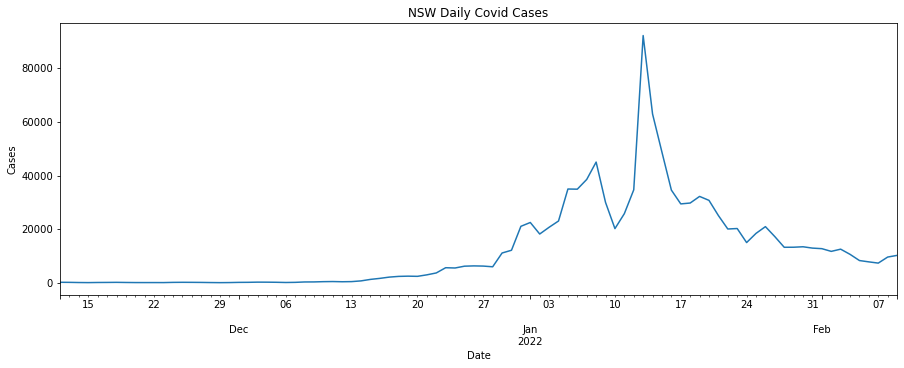

In [4]:
#look at daily cases plot for NSW
d['nsw'][:90].plot(x='DATE', y='NEW', legend=None)
plt.title('NSW Daily Covid Cases')
plt.xlabel('Date')
plt.ylabel('Cases')

Text(0, 0.5, 'Cases')

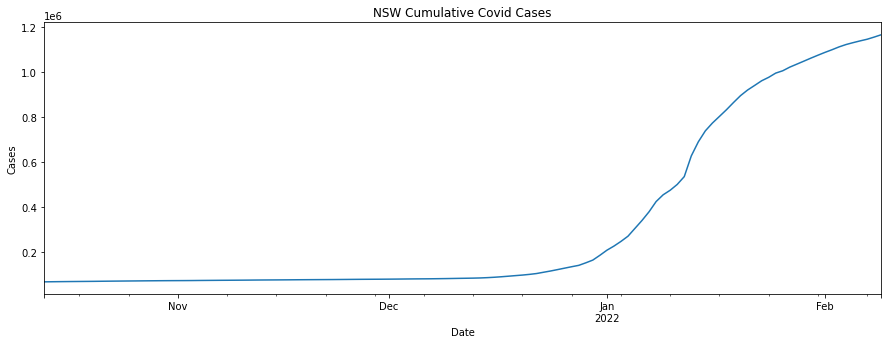

In [5]:
#look at cummulative cases plot for NSW
d['nsw'][:120].plot(x='DATE', y='CASES', legend=None)
plt.title('NSW Cumulative Covid Cases')
#plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Cases')

In [6]:
X = d['nsw'].DATE
Y1, Y2, Y3, Y4= d['nsw'].HOSP, d['nsw'].ICU, d['nsw'].VENT, d['nsw'].NEW

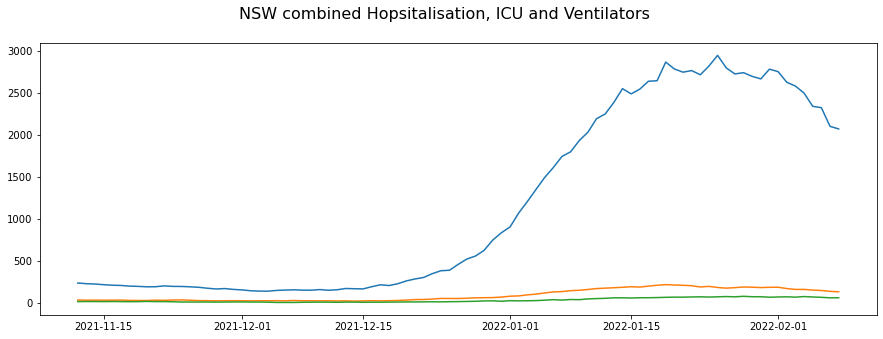

In [7]:
fig, ax = plt.subplots()
fig.suptitle('NSW combined Hopsitalisation, ICU and Ventilators', fontsize=16)
ax.plot(X[1:90], Y1[1:90], X[1:90], Y2[1:90], X[1:90], Y3[1:90])

In [8]:
#create function to plot the last 70 days for each state and territory, also combined cases for Australia

def state(state, fullname):
    X = d[state].DATE
    Y1, Y2, Y3, Y4= d[state].HOSP, d[state].ICU, d[state].VENT, d[state].NEW
    plt.rcParams['figure.figsize'] = [15, 10]
    fig, (ax1, ax2, ax3) = plt.subplots(3)
    fig.suptitle(fullname, fontsize=16)
    ax1.plot(X[1:70], Y1[1:70], color='C1')
    ax1.set_title('Hospitalisations')
    ax2.plot(X[1:70], Y2[1:70], color='C0')
    ax2.set_title('ICU')
    ax3.plot(X[1:70], Y3[1:70], color='C2')
    ax3.set_title('Ventilators')


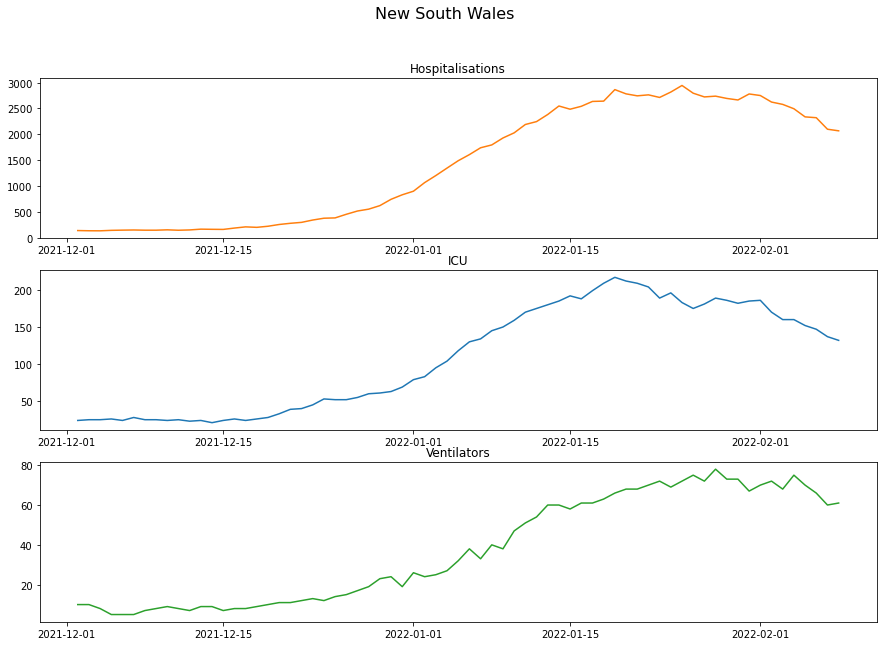

In [9]:
state('nsw', 'New South Wales')

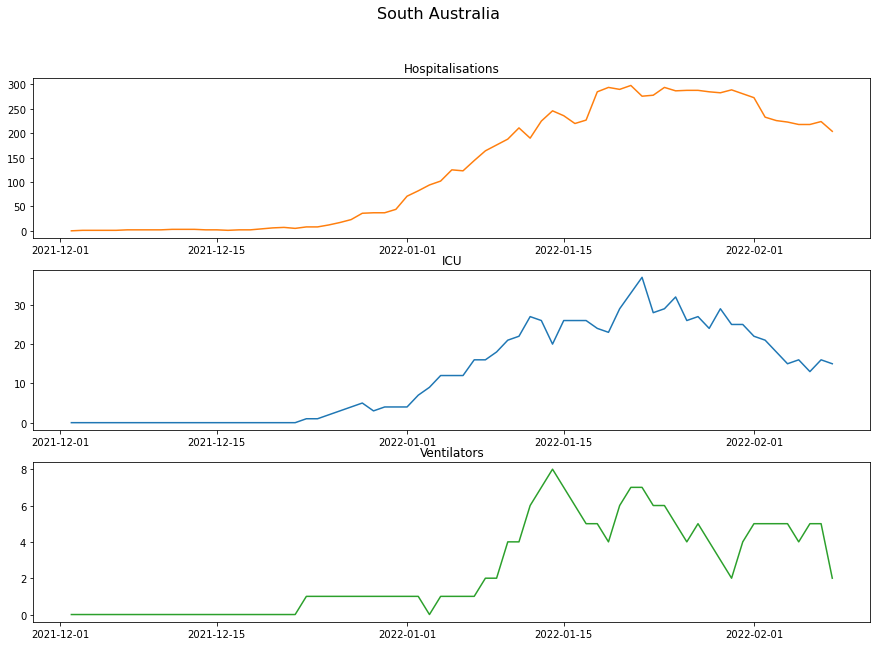

In [10]:
state('sa', 'South Australia')

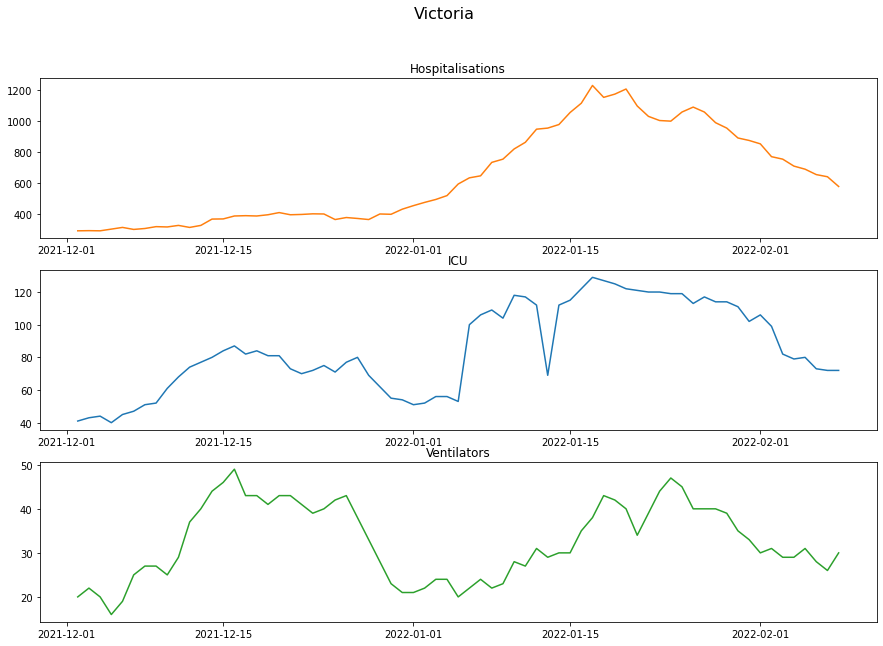

In [11]:
state('vic', 'Victoria')

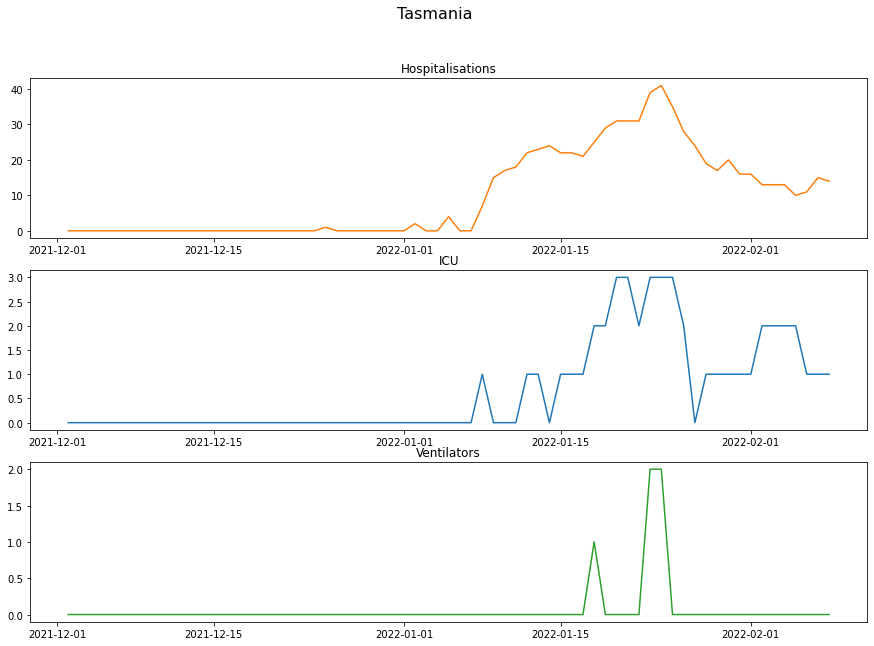

In [12]:
state('tas', 'Tasmania')

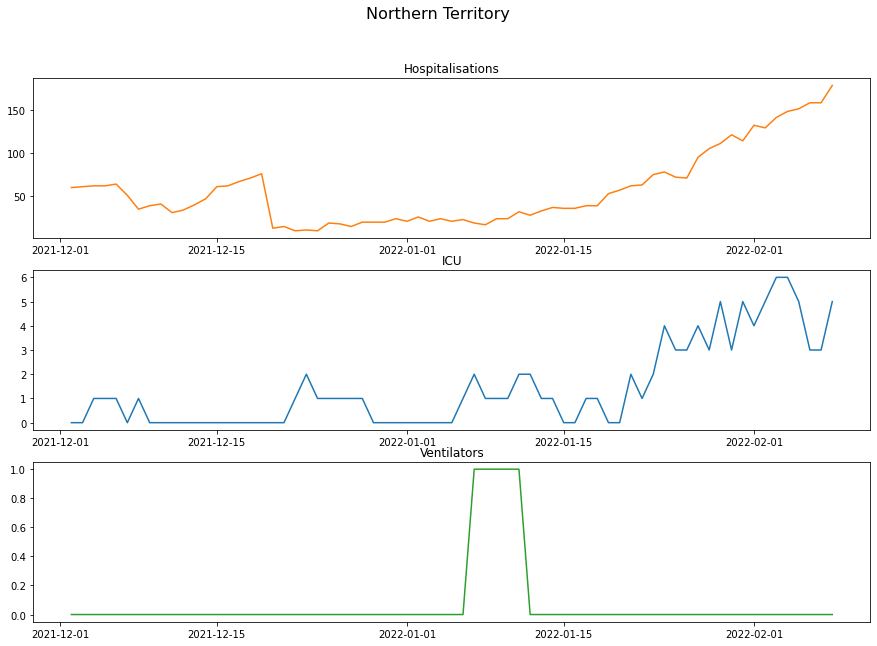

In [13]:
state('nt', 'Northern Territory')

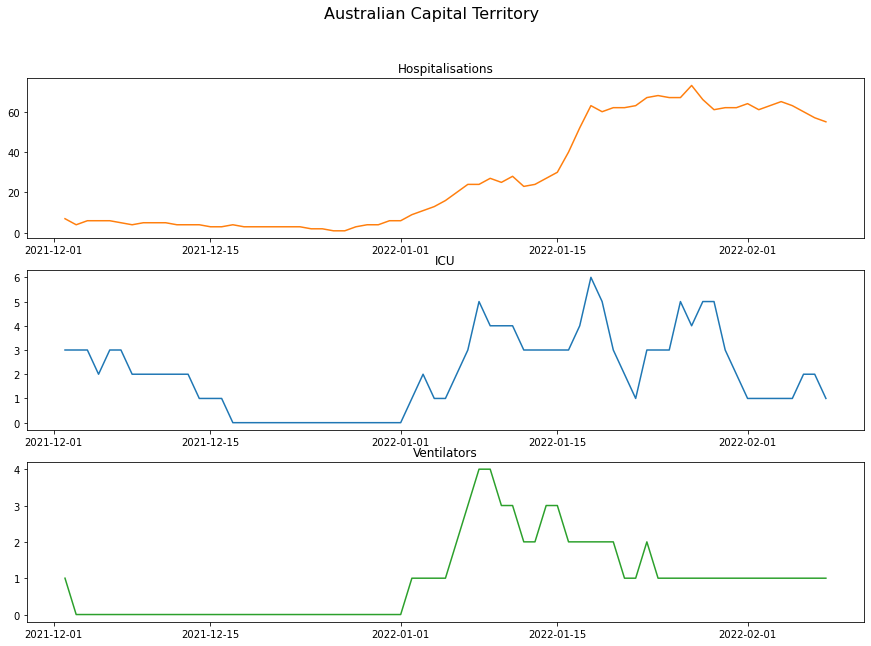

In [14]:
state('act', 'Australian Capital Territory')

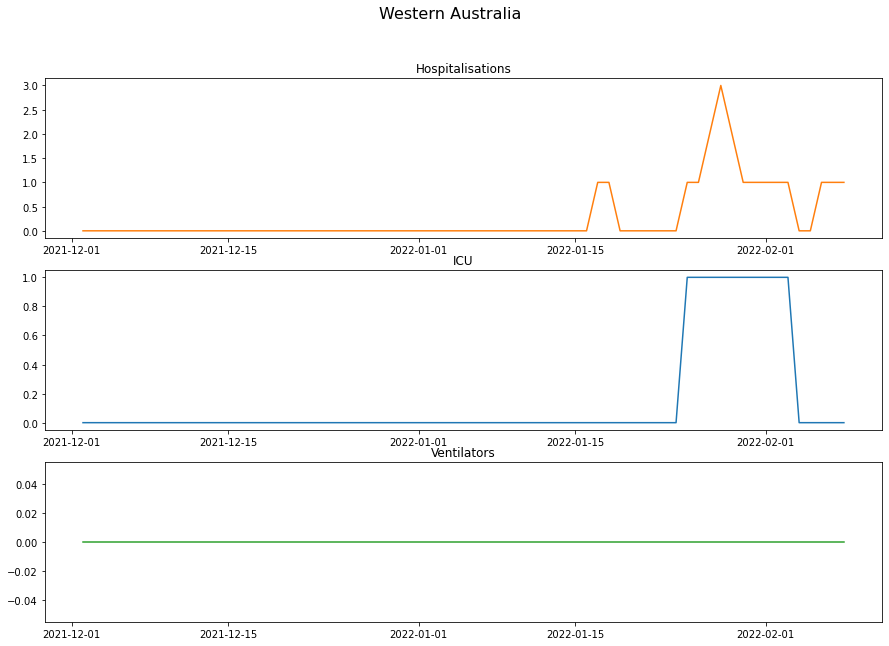

In [15]:
state('wa', 'Western Australia')

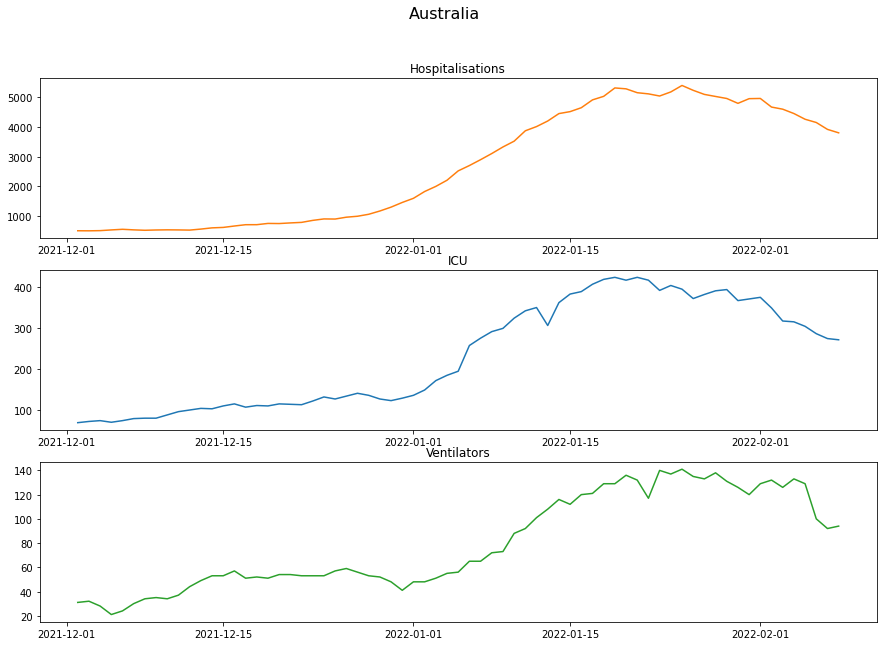

In [16]:
state('aus','Australia')

In [17]:
d['nt']

,DATE,NEW,CASES,HOSP,ICU,VENT,DEATHS,NET
0,2022-02-09,-,24350,178.0,5.0,0.0,5.0,-
1,2022-02-08,1092,24350,178.0,5.0,0.0,5.0,0
2,2022-02-07,831,23258,158.0,3.0,0.0,5.0,0
3,2022-02-06,867,22427,158.0,3.0,0.0,5.0,1
4,2022-02-05,968,21560,151.0,5.0,0.0,4.0,0
...,...,...,...,...,...,...,...,...
742,2020-01-29,0,0,0.0,0.0,0.0,0.0,0
743,2020-01-28,0,0,0.0,0.0,0.0,0.0,0
744,2020-01-27,0,0,0.0,0.0,0.0,0.0,0
745,2020-01-26,0,0,0.0,0.0,0.0,0.0,0
